# Simple Linear Regression Walkthrough

In this notebook, we will walk through a simple linear regression exercise.  Your homework assignment will be to perform the same steps with different datasets adding your work into this Jupyter notebook in the designated areas and answering questions about your work in a corresponding Moodle quiz.  

Side note: If you would like to see how these [Markdown format](https://daringfireball.net/projects/markdown/syntax) sections are written, I recommend [Adam Pritchard's Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet).  For any of these text sections, click on them and Edit to see the underlying syntax (i.e. structure, form) that generates the formatting you see.  Then press Control-Enter to interpret the syntax and see how the Markdown displays.


We begin by importing necessary definitions into our Python environment.  You will not need to re-import these for your exercises below.  Each import statement adds useful _libraries_ or parts thereof to our environment:
* **numpy** is a scientific computing library which includes fast, efficient, multidimensional arrays (i.e. tables) for our data
* **pandas** builds on numpy to give us efficient data structures (e.g. dataframes) and data analysis tools which are fundamental to data science <!-- * **pandas_profiling** adds tools for analyzing and helping us better understand our data.-->
* **matplotlib** is a 2D plotting library for scientific visualization
* **sklearn** provides a variety of regression, classification, and machine learning algorithms for building models of our data

These imports need only occur once before their use, and should not be copied and repeated below.  To start the notebook fresh and rerun the cells of your notebook, "Restart and run all..." (using the button or Kernel menu item).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Our first step is to read data from a [comma-separated values (CSV) file](https://en.wikipedia.org/wiki/Comma-separated_values) named "`data.csv`".  First, we will form a [Uniform Resource Identifier (URI)](https://en.wikipedia.org/wiki/Uniform_Resource_Identifier), a string of characters that unambiguously identifies the location of this CSV file resource.  Then, we will load the CSV data into a `pandas` dataframe "`df`" like this:

In [3]:
# This is a comment.  In Python, anything from a "#" to the end of the line is ignored.

# On the next line, we define the data path variable "data_path", a string of character that indicates where we'll look to find our data.
data_path = 'http://cs.gettysburg.edu/~tneller/ds256/data/slr/'

# Next, we'll being a complete specification of where our file is and which file, by _concatenating_ the characters of the data_path with those of the specific data file:
uri = data_path + 'data.csv'  # Note: URI stands for Uniform Resource 

# Next, we'll define a variable "df" (short for "dataframe"), that will hold a pandas dataframe read from that filename 
df = pd.read_csv(uri)

Often, the amount of data is large and we wish to look at 5 random samples like this:

In [4]:
df.sample(5)

,id,x1,x2,x3,y
5869,5869,0.085845,-0.038144,-0.218610,-149.034559
4021,4021,0.219255,-0.059063,-0.049421,24.175307
2769,2769,-0.487965,-0.199621,-0.279179,-237.034813
6210,6210,-0.553849,-0.196738,0.166110,293.228648
3930,3930,-0.510892,-0.418379,0.303895,205.275875


We can see that the header column "id" is identical to the dataframe line numbering. Each line is an Our inputs (a.k.a. "predictors", "features", and "independent variables") are columns "x1", "x2", and "x3", whereas our output (a.k.a. "response", "outcome", "label", and "dependent variable") is column "y".

One can get a brief statistical description of our dataframe named "data" using the describe function as follows:

In [5]:
df.describe()

,id,x1,x2,x3,y
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.008262,-0.001218,0.002498,73.643143
std,2886.89568,0.306866,0.306426,0.307042,258.857934
min,0.00000,-0.741608,-0.799235,-0.777593,-394.015877
25%,2499.75000,-0.244056,-0.253918,-0.248610,-151.264042
50%,4999.50000,0.013338,0.000150,0.006883,77.530054
75%,7499.25000,0.259365,0.252016,0.254278,298.776930
max,9999.00000,0.799406,0.766355,0.780436,534.482892


Note that "std", the standard deviation, means that if the distribution is a normal (a.k.a. Gaussian)
then 68%, 95%, and 99.7% of the distribution is within 1, 2, and 3 standard deviations of the mean, respectively.
If the distribution is normal, this doesn't apply, but standard deviation $\sigma$ squared is the variance $\sigma^2$,
a measure of how much the data varies from the mean.

Two variables are [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence) to the extent that they are linearly related.  We can see correlations between the data using pandas and matplotlib:

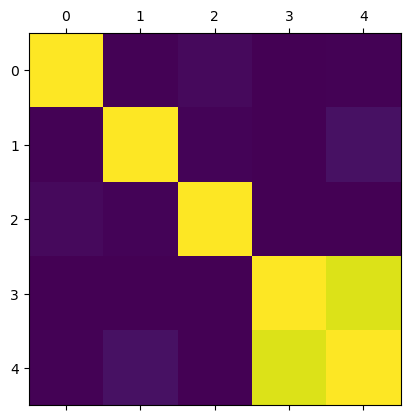

In [6]:
plt.matshow(df.corr())
plt.show()

Each column is perfectly correlated with itself, showing yellow in the correlation matrix above.  Additionally, we note that columns 3 and 4 ("x3" and "y", respectively) are highly correlated with each other.  This doesn't mean that other features aren't helpful for building a model, but it does mean that we expect "x3" to be more important for predicting "y".

We can create our input features dataframe and our output responses data frame by creating new named view of these labeled column slices.


In [7]:
X = df[['x1', 'x2', 'x3']]
y = df[['y']]

Next, we build a linear regression model using our X features and y response. This involves creating a LinearRegressor object (from sk-learn), and using it with this data to compute a linear "model" of the relationship between X and y:

In [8]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

We can access the regression model through its "intercept_" and "coef_" values as shown below.  From these, we can see that we have a y-intercept (y value at x=0) of 71.35781377, and x1, x2, and x3 coefficients of 35.33598059, -2.46524515, and 796.89909406, respectively.  Thus, our linear model is:

y = 71.35781377 + 35.33598059 * x1 + -2.46524515 * x2 + 796.89909406 * x3

In [9]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)


[71.35781377]
[[ 35.33598059  -2.46524515 796.89909406]]


We can see the [$R^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination), i.e. the proportion of the variance in the output that is predictable from the inputs of our model prediction, as follows:

In [10]:
linear_regressor.score(X, y)

0.8944538590150857

Not bad!  We can also use our model to see the values predicted from our original inputs: 

In [11]:
y_pred = linear_regressor.predict(X)

Knowing from before that feature "x3" has the highest correlation with "y", we can also scatterplot the results, showing the predicted values as (x3,y_pred) points in red on top of the original (x3,y) points in blue. 

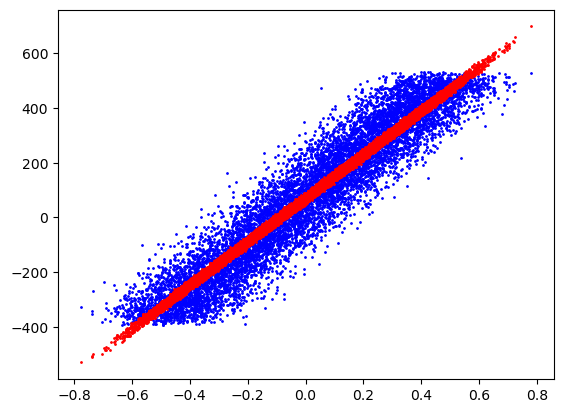

In [12]:
plt.scatter(X[['x3']], y, s=1, color='blue')
plt.scatter(X[['x3']], y_pred, s=1, color='red')
plt.show()

To make a prediction for an unknown value, one can also use the "predict" function.
For example, let's see what would be predicted as a y value when all x values are set to 0.5:

In [13]:
print(linear_regressor.predict([[.5, .5, .5]]))

[[486.24272852]]


/Accounts/turing/faculty/tneller/miniconda3/envs/cs371/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Thus, our linear regression would predict a y value of 486.24272852 at [x1, x2, x3] = [.5, .5, .5].  
When [x1, x2, x3] = [.1, -.2, -.4], y is predicted to be -243.37517677:

In [14]:
print(linear_regressor.predict([[.1, -.2, -.4]]))

[[-243.37517677]]


/Accounts/turing/faculty/tneller/miniconda3/envs/cs371/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Exercises

For these exercises, you will both add on to this Jupyter Notebook to show your work after each corresponding code block comment below. 

### Exercise 1

In the Exercise 1 space below, load data file **hw1ex1.csv** at the same location as **data.csv** above, practice the same techniques above to load the data, display samples and statistics of the data, perform a linear regression of y on x values, print the coefficients and $R^2$ score, and make the requested prediction.

In [15]:
# load data into a dataframe and describe it

# create separate 'X' and 'y' dataframes of the data

# perform linear regression

# print the x coefficients, the y-intercept, and the R^2 score

# print a y prediction for the X value given: x1 = .3


### Exercise 2

In the Exercise 2 space below, load data file **hw1ex2.csv** at the same location as **data.csv** above, practice the same techniques above to load the data, display samples and statistics of the data, perform a linear regression of y on x values, print the coefficients and $R^2$ score, and make the requested prediction.

In [16]:
# load data into a dataframe and describe it

# create separate 'X' and 'y' dataframes of the data

# perform linear regression

# print the x coefficients, the y-intercept, and the R^2 score

# print a y prediction for the X values given: x1 = -.1, x2 = .4, x3 =.1


### Exercise 3

In the Exercise 3 space below, load data file **hw1ex3.csv** at the same location as **data.csv** above, practice the same techniques above to load the data, display samples and statistics of the data, perform a linear regression of y on x values, print the coefficients and $R^2$ score, and make the requested prediction.

In [17]:
# load data into a dataframe and describe it

# create separate 'X' and 'y' dataframes of the data

# perform linear regression

# print the x coefficients, the y-intercept, and the R^2 score

# print a y prediction for the X values given: x1 = -.5, x2 = .3, x3 = .2, x4 = -.2, x5 = 0